In [1]:
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt33
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()
# from sklearn.datasets import make_blobs
# X, y = mglearn.datasets.make_forge()
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.datasets import make_circles

C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X, y = mglearn.datasets.make_forge()

C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
# X[:10]
# y[:10]
print("X.shape :",X.shape, "y.shape :",y.shape)

X.shape : (26, 2) y.shape : (26,)


In [6]:
type(X[:,0])  # numpy.ndarray
type(y)  # numpy.ndarray

numpy.ndarray

Text(0, 0.5, '2nd feature')

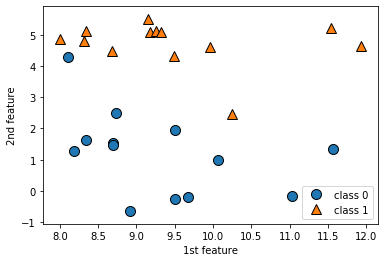

In [3]:
## scatter plot
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")

Text(0, 0.5, 'Target')

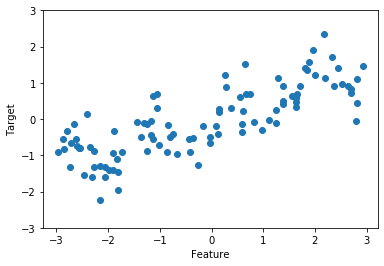

In [10]:
## mglearn으로 산점도 그리기
X, y = mglearn.datasets.make_wave(n_samples=100)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys()) 
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
cancer.data[:5]
cancer.target[:5]
cancer.data.shape  # (569, 30)
cancer.target.shape  # (569,)
cancer.target[[cancer.target == 0]].shape  # 212

array([0, 0, 0, 0, 0])

In [16]:
import numpy as np
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [ ]:
cancer.feature_names.shape  # (30,)
cancer.target_names  # array(['malignant', 'benign'], dtype='<U9')

○ 보스턴 데이터

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
print(type(boston))
print(boston.data.shape)  # (506, 13)

(506, 13)


## ★★★ Extending feature

In [22]:
X, y = mglearn.datasets.load_extended_boston()

## KNN Fitting

In [26]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
X_train.shape  # (19, 2)
X_test.shape  # (7, 2)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
y_pred = clf.predict(X_test)
round(np.mean(y_pred == y_test),2)
round(clf.score(X_test, y_test),2)

0.86

## KNN Visualization

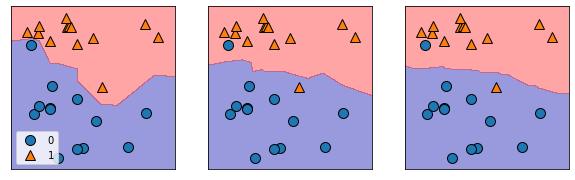

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)  # eps : 여백조정, alpha : 배경농도
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
axes[0].legend(loc=3)  # 3사분면에 범례 위치시킴

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [61]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [62]:
for n_nbs in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_nbs)
    clf.fit(X_train, y_train)
    training_accuracy.append(np.mean(clf.predict(X_train)==y_train))
    test_accuracy.append(np.mean(clf.predict(X_test)==y_test))

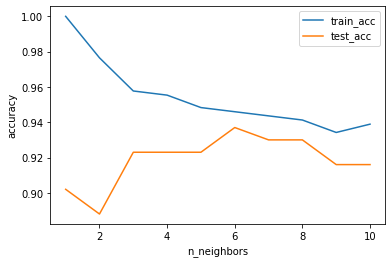

In [65]:
plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [74]:
## weights
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [78]:
## R^2
print("train R^2 ",round(lr.score(X_train, y_train),2))
print("test R^2 ", round(lr.score(X_test, y_test),2))

train R^2  0.67
test R^2  0.66


## Ridge Regression > 보스턴 데이터

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [84]:
print("train R^2",lr.score(X_train,y_train))
print("test R^2",lr.score(X_test,y_test))

train R^2 0.9520519609032729
test R^2 0.6074721959665881


In [95]:
from sklearn.linear_model import Ridge
for i in range(0,11):
    ridge_ = Ridge(alpha=i*0.1).fit(X_train,y_train)
    print('alpha = ',round(i*0.1,1),
          ' train: ',round(ridge_.score(X_train,y_train),2),
          'test: ',round(ridge_.score(X_test,y_test),2))

alpha =  0.0  train:  0.95 test:  0.6
alpha =  0.1  train:  0.93 test:  0.77
alpha =  0.2  train:  0.92 test:  0.77
alpha =  0.3  train:  0.91 test:  0.77
alpha =  0.4  train:  0.91 test:  0.77
alpha =  0.5  train:  0.9 test:  0.77
alpha =  0.6  train:  0.9 test:  0.76
alpha =  0.7  train:  0.9 test:  0.76
alpha =  0.8  train:  0.89 test:  0.76
alpha =  0.9  train:  0.89 test:  0.76
alpha =  1.0  train:  0.89 test:  0.75


In [154]:
alpha_ = []
for i in range(0,11):
    alpha_.append(round(i*0.1,2))
train_score = []
test_score = []

In [155]:
from sklearn.linear_model import Ridge
for i in range(0,11):
    ridge_ = Ridge(i*0.1).fit(X_train, y_train)
    train_score.append(round(ridge_.score(X_train, y_train),2))
    test_score.append(round(ridge_.score(X_test, y_test),2))
    globals()['ridge_0' + str(i)] = ridge_

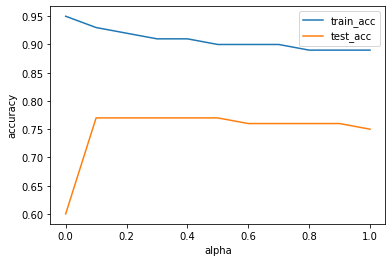

In [121]:
## Ridge 계수에 따른 train, test 정확도 그래프 그리기
plt.plot(alpha_, train_score, label="train_acc")
plt.plot(alpha_, test_score, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("alpha")
plt.legend()

(-5.15, 108.15)

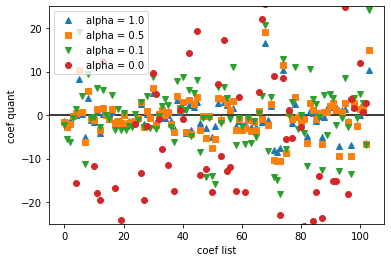

In [168]:
plt.plot(ridge_010.coef_, '^', label = 'alpha = 1.0')
plt.plot(ridge_05.coef_, 's', label = 'alpha = 0.5')
plt.plot(ridge_01.coef_, 'v', label = 'alpha = 0.1')
plt.plot(ridge_00.coef_, 'o', label = 'alpha = 0.0')

plt.xlabel("coef list")
plt.ylabel("coef quant")
plt.ylim(-25,25)
plt.legend()
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)

## Lasso Regression > 보스턴 데이터

In [18]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso1    = Lasso(alpha = 1,     max_iter=100000).fit(X_train, y_train)
lasso001  = Lasso(alpha = 0.01,  max_iter=100000).fit(X_train, y_train)
lasso0001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
Ridge01   = Ridge(0.1).fit(X_train, y_train)

In [12]:
print(lasso1.score(X_train, y_train))
print(lasso1.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [19]:
for i in ['lasso1','lasso001','lasso0001','Ridge01']:
    print(round(globals()[i].score(X_train, y_train),2), round(globals()[i].score(X_test, y_test),2))

0.29 0.21
0.9 0.77
0.95 0.64
0.93 0.77


(-25, 25)

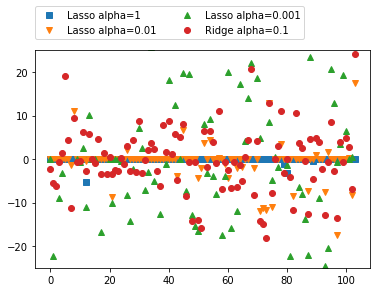

In [20]:
plt.plot(lasso1.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, 'v', label = 'Lasso alpha=0.01')
plt.plot(lasso0001.coef_, '^', label = 'Lasso alpha=0.001')
plt.plot(Ridge01.coef_, 'o', label = 'Ridge alpha=0.1')

plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25, 25)

## LogisticReg > forge 데이터 

C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


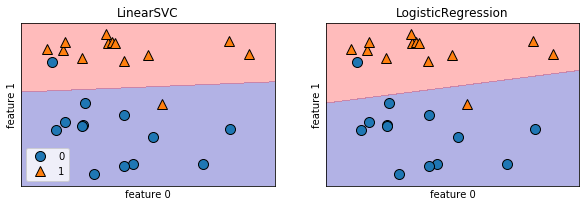

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.3)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()
    

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=42)

In [8]:
for i, j in zip([100, 1, 0.01], ['_100', '_1', '_001']):
    logreg = LogisticRegression(C=i).fit(X_train, y_train)
    print(round(logreg.score(X_train, y_train),2))
    print(round(logreg.score(X_test, y_test),2))
    globals()['logreg' + j] = logreg

0.97
0.97
0.96
0.96
0.93
0.93


C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'coef')

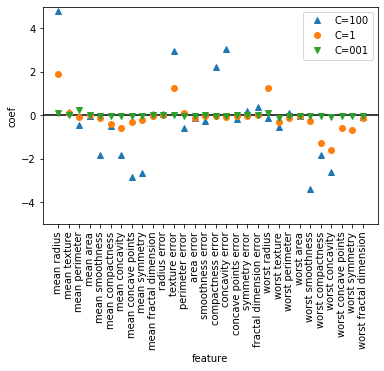

In [28]:
plt.plot(logreg_100.coef_.T, '^', label = 'C=100')
plt.plot(logreg_1.coef_.T, 'o', label = 'C=1')
plt.plot(logreg_001.coef_.T, 'v', label = 'C=001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.legend()
## 중앙 가로선 만들기
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef")

C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9131455399061033
0.9230769230769231
0.960093896713615
0.958041958041958
0.9859154929577465
0.9790209790209791


C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'coef')

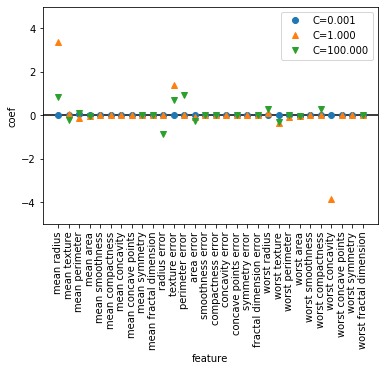

In [32]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print(lr_l1.score(X_train, y_train))
    print(lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.legend()
## 중앙 가로선 만들기
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef")

## SVM (linear) > make_blobs Data

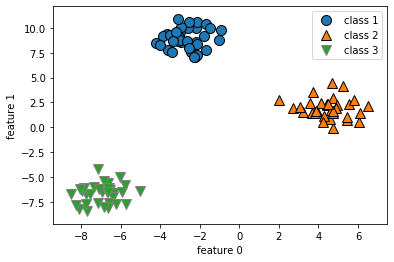

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 1','class 2','class 3'])

In [18]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [ ]:
## SVM 분류 경계선 만들기

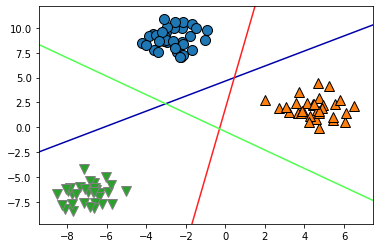

In [19]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

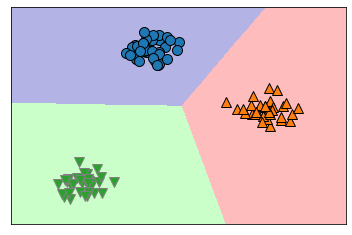

In [22]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

## 의사결정나무

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train acc: ",tree.score(X_train, y_train))
print("test acc: ",tree.score(X_test, y_test))

train acc:  1.0
test acc:  0.9370629370629371


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("train acc: ",tree.score(X_train, y_train))
print("test acc: ",tree.score(X_test, y_test))

train acc:  0.9882629107981221
test acc:  0.951048951048951


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["bad", "good"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [13]:
# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [14]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [39]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

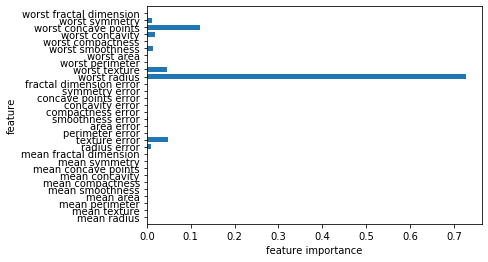

In [31]:
plot_feature_importances_cancer(tree)

In [32]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [41]:
for i in [0.1, 0.25, 0.5, 0.75, 0.9]:
    print('quantile :',i, ram_prices['price'].quantile(i))    

quantile : 0.1 0.0085
quantile : 0.25 0.126
quantile : 0.5 8.0
quantile : 0.75 133.0
quantile : 0.9 1240.8000000000052


In [53]:
ram_prices['price'].max()

411041792.0

(array([331.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.70000000e-03, 4.11041792e+07, 8.22083584e+07, 1.23312538e+08,
        1.64416717e+08, 2.05520896e+08, 2.46625075e+08, 2.87729254e+08,
        3.28833434e+08, 3.69937613e+08, 4.11041792e+08]),
 <a list of 10 Patch objects>)

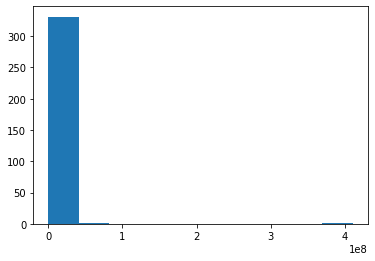

In [54]:
plt.hist(ram_prices['price'])

Text(0, 0.5, 'price')

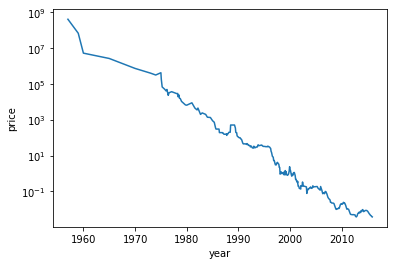

In [55]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price")

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

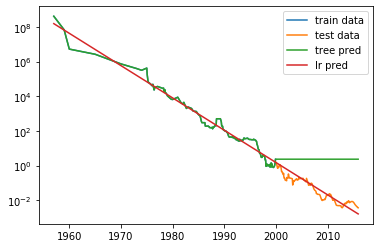

In [68]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree pred")
plt.semilogy(ram_prices.date, price_lr, label="lr pred")
plt.legend()

## 앙상블 > 랜포

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [37]:
## B.C. 데이터 랜덤포레스트
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("train acc: {:.3f}".format(forest.score(X_train, y_train)))
print("test acc: {:.3f}".format(forest.score(X_test, y_test)))

train acc: 1.000
test acc: 0.972


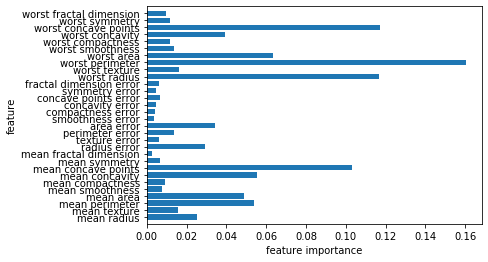

In [40]:
plot_feature_importances_cancer(forest)

## Gradient Boosting Regression Tree

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("train acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test  acc: {:.3f}".format(gbrt.score(X_test, y_test)))

train acc: 1.000
test  acc: 0.965


In [45]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("train acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test  acc: {:.3f}".format(gbrt.score(X_test, y_test)))

train acc: 0.991
test  acc: 0.972


In [46]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("train acc: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test  acc: {:.3f}".format(gbrt.score(X_test, y_test)))

train acc: 0.988
test  acc: 0.965


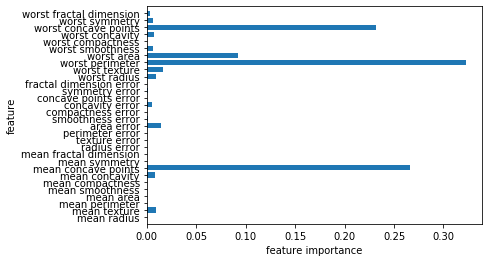

In [48]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

## SVM with Kernel

In [25]:
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

In [26]:
sv_labels  # array([[False, False, False,  True,  True]])

array([False, False, False,  True,  True])

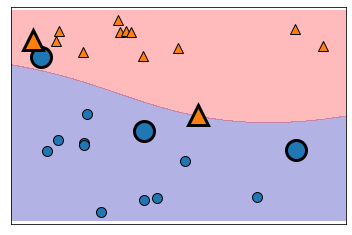

In [35]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, fill=True, eps=0.3, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# Support Vector -> Bold
sv = svm.support_vectors_
# dual_coef_의 부호 -> 서포트벡터의 레이블
sv_lables = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=20, markeredgewidth=3)

#### hyperparameter 조정

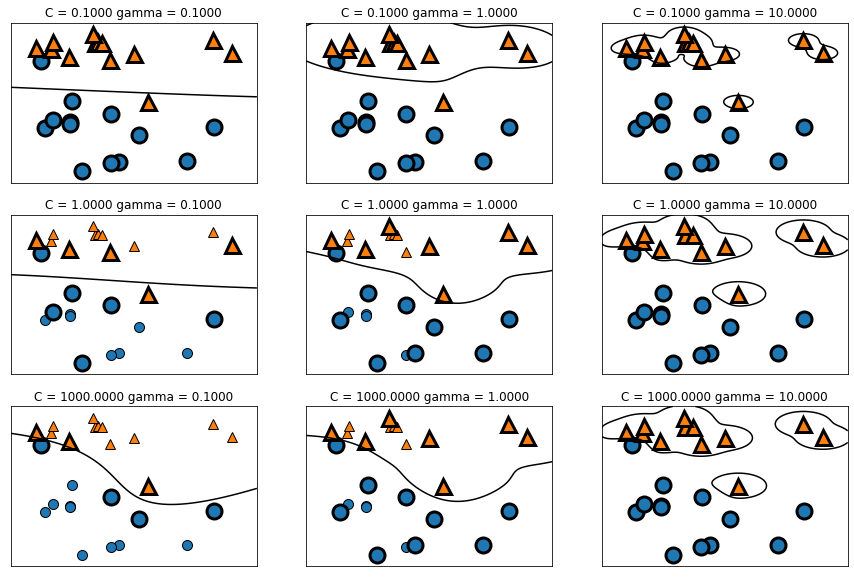

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.6293706293706294


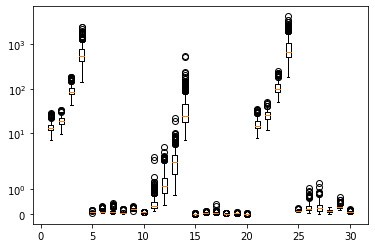

In [50]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")

In [59]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))
# scale test_set with 'min, max of train'
X_test_scaled = (X_test - min_on_training) / range_on_training

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [62]:
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9483568075117371
0.951048951048951


In [63]:
svc = SVC(C=1000, gamma='auto')
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


## Uncertainty of Classification

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# [0 -> blue], [1 -> red] (changing class_name)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
X.shape  # 100, 2
y.shape  # 100, 
print(X[:,0].min(), X[:,0].max())
print(X[:,1].min(), X[:,1].max())

7.998152872102121 11.930271360747538
-0.6399322515976771 5.498322463299331


In [89]:
## 0 -> blue, 1 -> red (changing class_name)
# y_named = np.array([])
# for i in range(0, y.shape[0]):
#     if y[i]==1:
#         y_named = np.append(y_named, ['red'])
#     elif y[i]==0:
#         y_named = np.append(y_named, ['blue'])

In [115]:
gbrt.decision_function(X_test).shape  # (25,)
gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

In [4]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [5]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
np.all(pred == gbrt.predict(X_test))

True

#### Painting 'Decision_function value' 

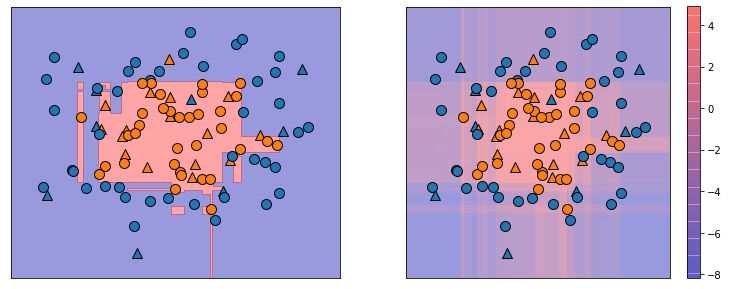

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha = 0.4,
                               fill = True, cm=mglearn.cm2)
# 하단에서 colorbar를 만들기 위해 scores_image로 변수명 지정
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1],
                                           alpha = 0.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                            markers='o', ax=ax)
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.draw_all()

#### Painting 'predict_proba' value

In [10]:
print(gbrt.predict_proba(X_test).max())
print(gbrt.predict_proba(X_test).min())

0.9995432747733858
0.00045672522661426403


In [13]:
gbrt.predict_proba(X_test)[:,0] + gbrt.predict_proba(X_test)[:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

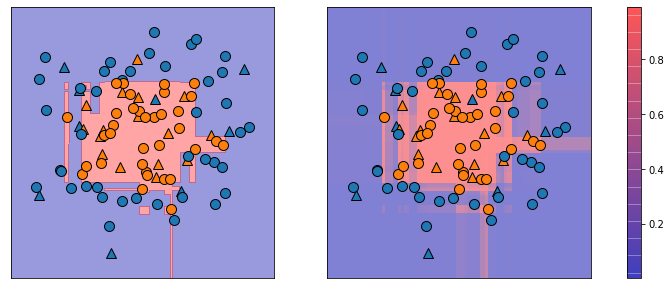

In [14]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(
gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                            markers='o', ax=ax)
cbar = plt.colorbar(scores_image, ax=axes.tolist())

#### Uncertainty of SVC

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0)
svm = SVC(probability=True, random_state=0, gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

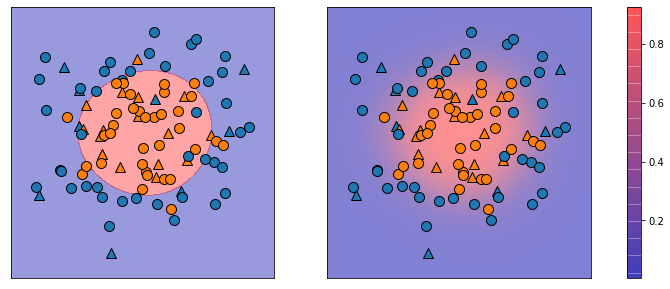

In [25]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(
svm, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
svm, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                            markers='o', ax=ax)
cbar = plt.colorbar(scores_image, ax=axes.tolist())

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test))

0.9910714285714286 1.0


In [32]:
print(gbrt.decision_function(X_test).shape)
print(gbrt.decision_function(X_test)[:6,:])

(38, 3)
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [36]:
# gbrt.predict_proba(X_test)[:6]
gbrt.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [40]:
max_prob = np.argmax(gbrt.predict_proba(X_test), axis=1)
gbrt_pred = gbrt.predict(X_test)

In [43]:
(max_prob == gbrt_pred)[False].shape

(0, 38)